# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fachri Kurniansyah
- **Email:** fachrikurniansyah270803@gmail.com
- **ID Dicoding:** fachri270803

## Menentukan Pertanyaan Bisnis

- Bagaimana pergerakan jumlah peminjaman sepeda berubah seiring waktu? 
- Bagaimana musim memengaruhi jumlah peminjaman sepeda?
- Bagaimana perbandingan dari pengguna kasual dan pengguna yang terdaftar? 
- Bagaimana performa peminjaman sepeda tiap bulan? (Clustering)

## Import Semua Packages/Library yang Digunakan

Library yang digunakan pada analisis ini adalah **pandas** untuk membuat dataframe dari bentuk .csv. Lalu ada **numpy** untuk mengolah data dalam bentuk array. setelahnya ada **matplotlib.pyplot** untuk membuat plot dengan **seaborn** untuk memperindah plot. yang terakhir adalah **warning** agar output yang dikeluarkan tidak mengeluarkan peringatan yang tidak penting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Wrangling

### Gathering Data

Tahap ini untuk mengimport data dari format .csv ke bentuk dataframe menggunakan library pandas.

In [2]:
raw_df = pd.read_csv("data\day.csv")
raw_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Assessing Data

Tahap ini dilakukan untuk melihat apakah terdapat missing value dan melihat apa saja variabel yang ada beserta tipe variabelnya.

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Tahap ini dilakukan untuk memastikan tidak terdapat data yang memiliki missing value, dan terlihat tidak ada yang memiliki missing value.

In [4]:
raw_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tahap ini untuk melihat apakah terdapat data duplikat, dan terlihat tidak ada satupun duplikat.

In [5]:
print("Jumlah duplikasi: ", raw_df.duplicated().sum())

Jumlah duplikasi:  0


Tahap ini untuk melihat lebih jelas karakteristik dari masing-masing variabel.

In [6]:
raw_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


### Cleaning Data

Tahap ini bertujuan untuk mengubah tipe variabel dari **dteday** dari object ke datetime, karena variabel tersebut adalah variabel time series.

In [7]:
df_time = raw_df.copy()

In [8]:
df_time['dteday'] = pd.to_datetime(df_time['dteday'])
df_time['dteday'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 731 entries, 0 to 730
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
731 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB


## Exploratory Data Analysis (EDA)

### Pengaruh hari-hari tertentu terhadap jumlah peminjaman

Tahap ini dilakukan untuk melihat apakah ada pengaruh dari hari-hari tertentu terhadap jumlah peminjaman rental sepeda. dan terlihat pada output dapat diasumsikan bahwa peminjaman sepeda akan tinggi di hari-hari kerja dan bukan weeekend maupun tanggal merah.

In [9]:
df = df_time.copy()

# Melakukan mapping untuk setiap variabel kategorikal
df['holiday'] = df['holiday'].map({0: 'Tidak', 1: 'Ya'})
df['weekday'] = df['weekday'].map({0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'})
df['workingday'] = df['workingday'].map({0: 'Tidak', 1: 'Ya'})

# Membuat pivot tabel untuk rata-rata jumlah peminjaman sepeda terhadap variabel kategorikal hari
pivot_holiday = df.groupby(by=["holiday"]).agg({
    "cnt": "mean"
}).reset_index()
pivot_weekday = df.groupby(by=["weekday"]).agg({
    "cnt": "mean"
}).reindex(['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']).reset_index()
pivot_workingday = df.groupby(by=["workingday"]).agg({
    "cnt": "mean"
}).reset_index()

# Menampilkan pivot tabel
pd.options.display.float_format = '{:.2f}'.format
print("Rata-rata jumlah peminjaman sepeda terhadap hari libur :")
print(pivot_holiday.to_string(index=False))
print("\n===============================================\n")
print("Rata-rata jumlah peminjaman sepeda terhadap hari :")
print(pivot_weekday.to_string(index=False))
print("\n===============================================\n")
print("Rata-rata jumlah peminjaman sepeda terhadap hari kerja :")
print(pivot_workingday.to_string(index=False))

Rata-rata jumlah peminjaman sepeda terhadap hari libur :
holiday     cnt
  Tidak 4527.10
     Ya 3735.00


Rata-rata jumlah peminjaman sepeda terhadap hari :
weekday     cnt
  Senin 4338.12
 Selasa 4510.66
   Rabu 4548.54
  Kamis 4667.26
  Jumat 4690.29
  Sabtu 4550.54
 Minggu 4228.83


Rata-rata jumlah peminjaman sepeda terhadap hari kerja :
workingday     cnt
     Tidak 4330.17
        Ya 4584.82


### Pengaruh cuaca dan musim terhadap jumlah peminjaman

Tahap ini dilakukan untuk melihat apakah ada pengaruh dari cuaca ataupun musim terhadap jumlah peminjaman rental sepeda. dan terlihat pada output dapat diasumsikan bahwa peminjaman sepeda akan tinggi di hari yang memiliki cuaca yang bagus dan bukan di musim semi.

In [10]:
df = df_time.copy()

# Melakukan mapping untuk setiap variabel kategorikal
df['weathersit'] = df['weathersit'].map({1: 'Cerah', 2: 'Berkabut', 3: 'Hujan Ringan', 4: 'Hujan Lebat'})
df['season'] = df['season'].map({1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'})

# Mengatur urutan kelas
weathersit_order = ['Cerah', 'Berkabut', 'Hujan Ringan', 'Hujan Lebat']
season_order = ['Semi', 'Panas', 'Gugur', 'Dingin']

# Membuat pivot tabel untuk rata-rata jumlah peminjaman sepeda terhadap variabel cuaca dan musim
pivot_weathersit = df.groupby(by=["weathersit"]).agg({
    "cnt": "mean"
}).reindex(weathersit_order, fill_value=0).reset_index()
pivot_season = df.groupby(by=["season"]).agg({
    "cnt": "mean"
}).reindex(season_order, fill_value=0).reset_index()

# Menampilkan pivot tabel
pd.options.display.float_format = '{:.2f}'.format
print("Rata-rata jumlah peminjaman sepeda terhadap keadaan cuaca :")
print(pivot_weathersit.to_string(index=False))
print("\n===============================================\n")
print("Rata-rata jumlah peminjaman sepeda terhadap musim :")
print(pivot_season.to_string(index=False))

Rata-rata jumlah peminjaman sepeda terhadap keadaan cuaca :
  weathersit     cnt
       Cerah 4876.79
    Berkabut 4035.86
Hujan Ringan 1803.29
 Hujan Lebat    0.00


Rata-rata jumlah peminjaman sepeda terhadap musim :
season     cnt
  Semi 2604.13
 Panas 4992.33
 Gugur 5644.30
Dingin 4728.16


### Perbandingan rata-rata dari pengguna biasa dan terdaftar

Tahap ini dilakukan untuk melihat apakah terdapat perbedaan dari rata-rata jumlah peminjam sepeda biasa dan yang terdaftar untuk setiap harinya. dan terlihat pada output dapat diasumsikan bahwa peminjam sepeda lebih banyak pengguna yang terdaftar dibandingkan peminjam biasa.

In [11]:
df = df_time.copy()

# Menghitung rata-rata dari kedua variabel
overall_avg_casual = df['casual'].mean()
overall_avg_registered = df['registered'].mean()

# Membuat DataFrame baru untuk hasil rata-rata
data = {'Variabel': ['Casual', 'Registered'],
        'Rata-rata': [overall_avg_casual, overall_avg_registered]}
pivot_table_overall = pd.DataFrame(data)

# Menampilkan pivot tabel
print("Pivot Tabel untuk rata-rata jumlah peminjaman sepeda dari dari pengguna biasa dan terdaftar :")
print(pivot_table_overall.to_string(index=False))

Pivot Tabel untuk rata-rata jumlah peminjaman sepeda dari dari pengguna biasa dan terdaftar :
  Variabel  Rata-rata
    Casual     848.18
Registered    3656.17


### Distribusi dari variabel kontinu dan kategorik

Tahap ini menampilkan distribusi dari semua variabel kontinu. Terlihat bahwa hampir semua variabel memiliki distribusi normal, kecuali pada variabel casual yang memiliki right skewed distribution yang berarti tiap harinya rata-rata pengguna biasa hanya sedikit.

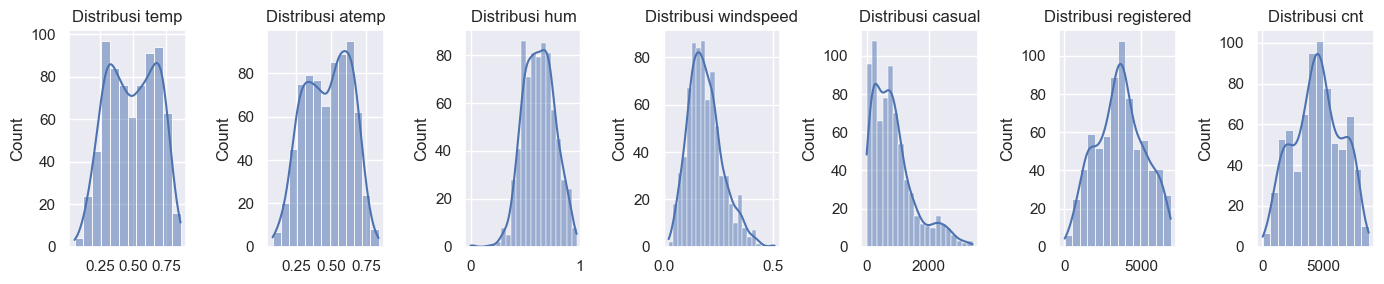

In [12]:
df = df_time.copy()

columns_to_plot = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Mengatur ukuran plot dan layout subplot
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(14, 3)) 
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Loop melalui setiap kolom dan membuat plot distribusi
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(f"Distribusi {column}")
    axes[i].set_xlabel('')  

# Menampilkan semua plot dalam satu output
plt.tight_layout()
plt.show()

Tahap ini menampilkan distribusi dari semua variabel kategorik. Terlihat bahwa hampir semua variabel memiliki distribusi kelas yang imbalance, kecuali pada variabel season yang memiliki distribusi kelas yang seimbang ddikarenakan lama musim tidak akan berubah setiap tahunnya.

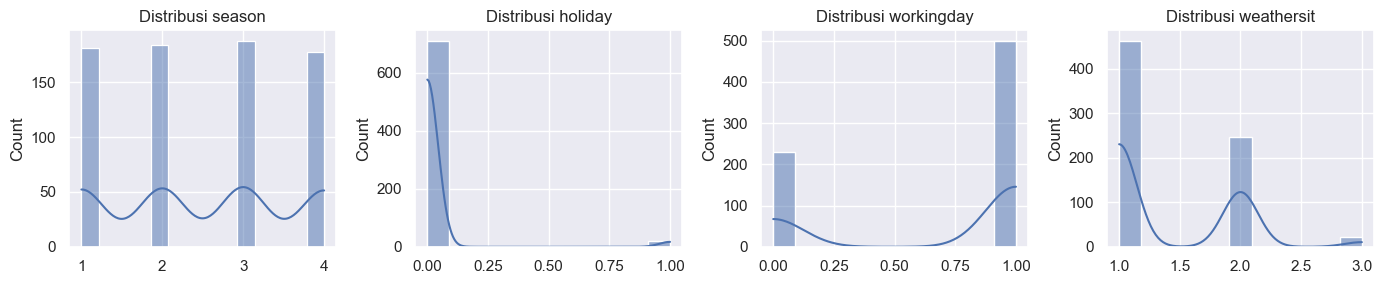

In [13]:
df = df_time.copy()

columns_to_plot = ['season', 'holiday', 'workingday', 'weathersit']

# Mengatur ukuran plot dan layout subplot
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14, 3))  
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Loop melalui setiap kolom dan membuat plot distribusi
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(f"Distribusi {column}")
    axes[i].set_xlabel('') 

# Menampilkan semua plot dalam satu output
plt.tight_layout()
plt.show()

### Plot Korelasi

Tahap ini menampilkan korelasi dari semua variabel yang ada. Korelasi ini dihitung menggunakan korelasi **Pearson**. Terlihat bahwa variabel workingday memiliki korelasi negatif yang kuat dengan variabel casual yang ditunjukkan oleh plot yang berwarna hitam pekat.

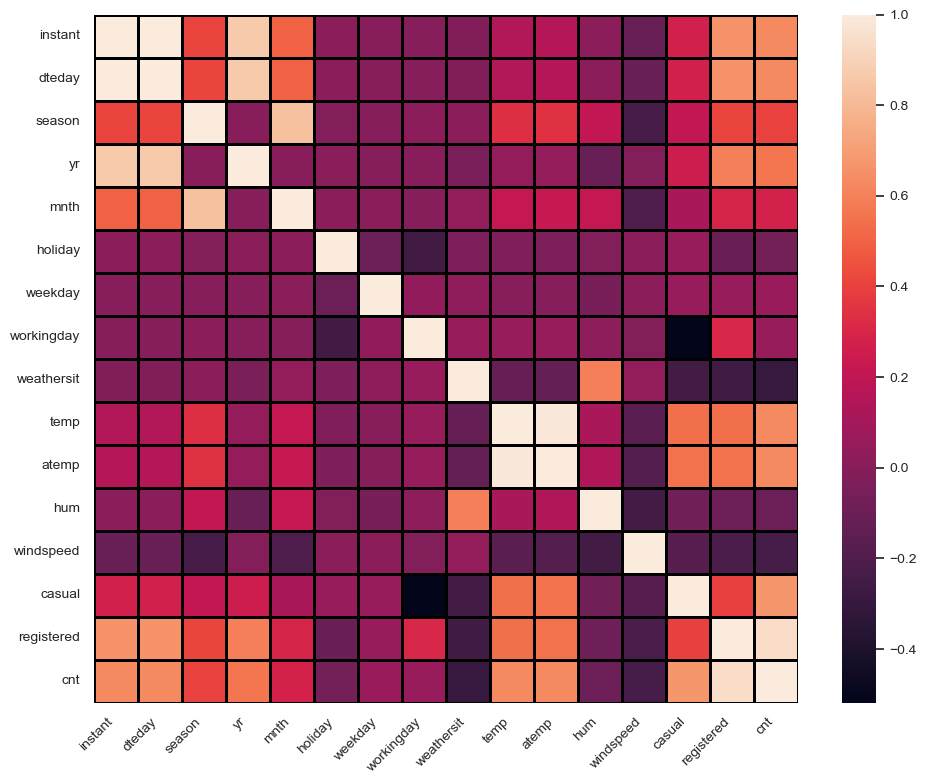

In [14]:
df = df_time.copy()

# Menghitung korelasi untuk setiap variabel
df = df[[col for col in df if df[col].nunique() > 1]]
corr = df.corr()

# Menamplikan plot korelasi
plt.figure(figsize=(10, 8)) 
heatmap = sns.heatmap(corr, fmt=".2f", linewidths=1, linecolor='black')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pergerakan jumlah peminjaman sepeda berubah seiring waktu? 

Tahap ini menampikan data time series pada jumlah peminjaman sepeda selama 2 tahun. ditampilkan juga nilai moving average untuk melihat pergerakan dari jumlah peminjaman dan garis tren untuk melihat apakah jumlahnya mengalami kenaikan atau penurunan. terlihat bahwa ada pola musiman dan ada tren naik secara keseluruhan.

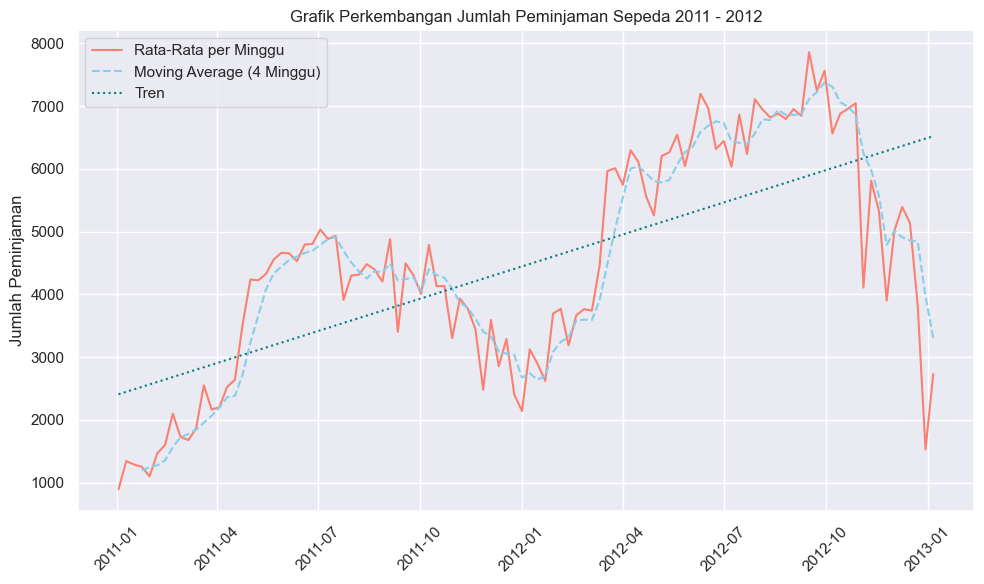

In [15]:
df = df_time.copy()

# Membuat rata-rata untuk setiap minggu dari jumlah peminjaman sepeda tiap harinya
df_weekly = df.resample('W', on='dteday').mean()
df_weekly['moving_avg'] = df_weekly['cnt'].rolling(window=4).mean()
x = np.arange(len(df_weekly)).reshape(-1, 1)
y = df_weekly['cnt'].values.reshape(-1, 1)
slope, intercept = np.polyfit(x.flatten(), y.flatten(), 1)
df_weekly['trend'] = intercept + slope * x

# Menampilkan plot time series
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_weekly.index, y='cnt', data=df_weekly, label='Rata-Rata per Minggu', color='salmon')
sns.lineplot(x=df_weekly.index, y='moving_avg', data=df_weekly, label='Moving Average (4 Minggu)', linestyle='--', color='skyblue')
sns.lineplot(x=df_weekly.index, y='trend', data=df_weekly, label='Tren', linestyle=':', color='teal')

plt.xlabel('')
plt.ylabel('Jumlah Peminjaman')
plt.title('Grafik Perkembangan Jumlah Peminjaman Sepeda 2011 - 2012')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana musim memengaruhi jumlah peminjaman sepeda?

Tahap ini menampikan stacked barchart berdasarkan musim tiap tahunnya. terlihat bahwa musim gugur menjadi musim yang memiliki jumlah peminjam paling banyak.

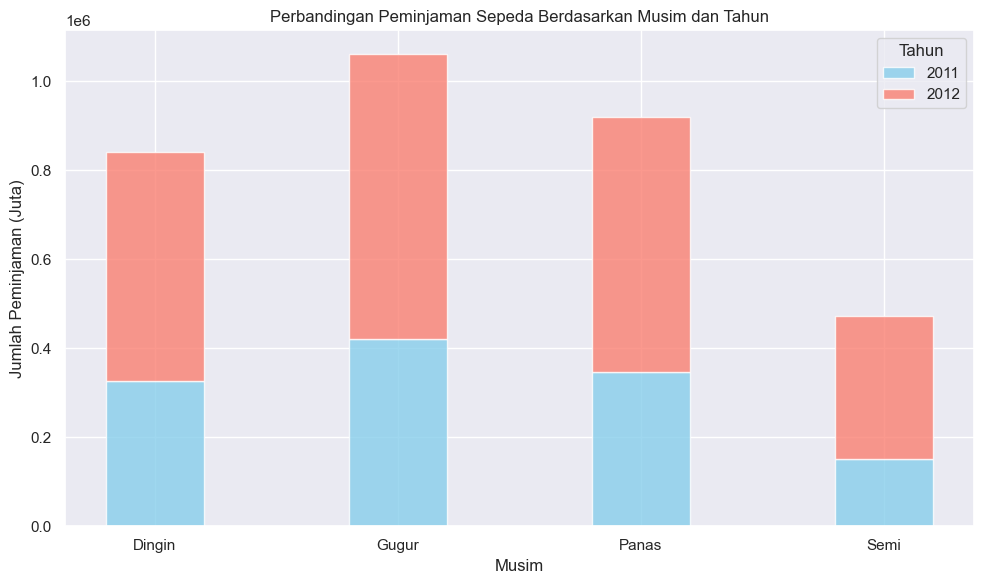

In [16]:
df = df_time.copy()

# Mapping untuk variabel kategorik
df['season'] = df['season'].map({1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'})
df['yr'] = df['yr'].map({0: '2011', 1: '2012'})

# Menghitung jumlah total peminjaman (cnt) untuk setiap kombinasi musim dan tahun
pivot_season_year = df.groupby(['season', 'yr'])['cnt'].sum().reset_index()
x = pivot_season_year['season'].unique()
y1 = pivot_season_year[pivot_season_year['yr'] == '2011']['cnt']
y2 = pivot_season_year[pivot_season_year['yr'] == '2012']['cnt']

# Membuat plot stacked barchart
plt.figure(figsize=(10, 6))
plt.bar(x, y1, color='skyblue', label='2011', width=0.4, alpha=0.8)
plt.bar(x, y2, bottom=y1, color='salmon', label='2012', width=0.4, alpha=0.8)

plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman (Juta)')
plt.title('Perbandingan Peminjaman Sepeda Berdasarkan Musim dan Tahun')
plt.legend(title='Tahun')

plt.tight_layout()
plt.show()

### Pertanyaan 3: Bagaimana perbandingan dari pengguna kasual dan pengguna yang terdaftar? 

Tahap ini menampilkan 2 pie chart yang masing-masing merepresentasikan perbandingan pengguna kasual dan terdaftar dalam persentase untuk tiap tahunnya. Terlihat bahwa untuk tiap tahun, pengguna terdaftar mendominasi hingga 80% dari total peminjaman.

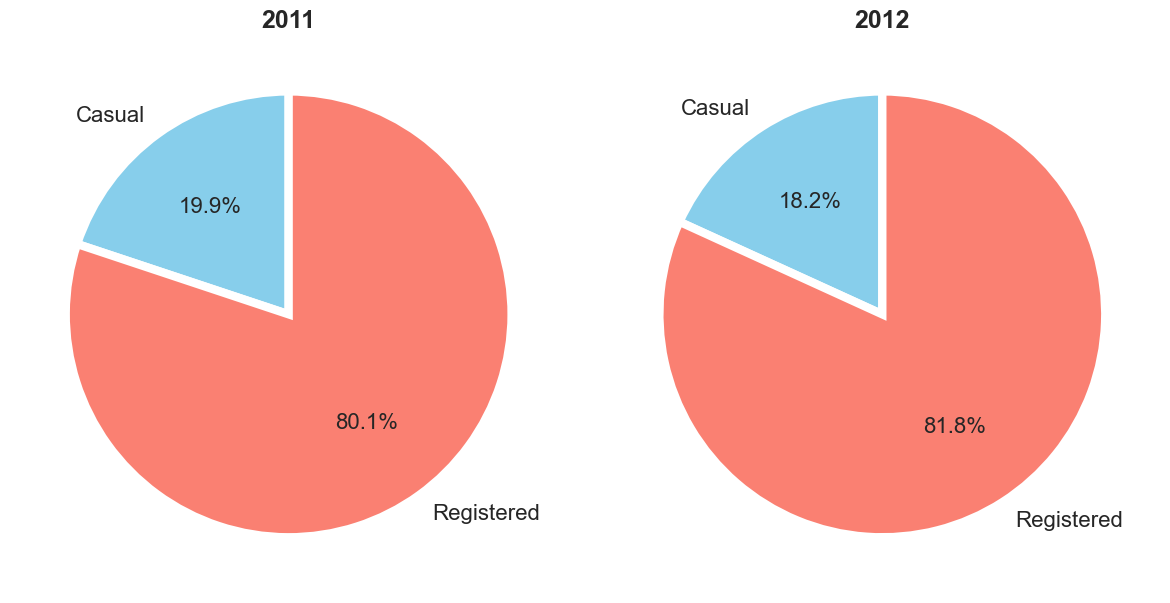

In [17]:
df = df_time.copy()

# Mapping untuk variabel kategorik
df['yr'] = df['yr'].map({0: '2011', 1: '2012'})

# Menghitung rata-rata casual dan registered untuk setiap tahun
avg_data = df.groupby('yr').mean().reset_index()

# Menampilkan pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

labels_2011 = ['Casual', 'Registered']
sizes_2011 = avg_data.loc[avg_data['yr'] == '2011', ['casual', 'registered']].values.flatten()
axes[0].pie(sizes_2011, labels=labels_2011, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'],
           wedgeprops={'linewidth': 6, 'edgecolor': 'white'}, textprops={'fontsize': 16})
axes[0].set_title('2011', fontdict={'fontsize': 18, 'fontweight': 'bold'})

labels_2012 = ['Casual', 'Registered']
sizes_2012 = avg_data.loc[avg_data['yr'] == '2012', ['casual', 'registered']].values.flatten()
axes[1].pie(sizes_2012, labels=labels_2012, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'],
           wedgeprops={'linewidth': 6, 'edgecolor': 'white'}, textprops={'fontsize': 16})
axes[1].set_title('2012', fontdict={'fontsize': 18, 'fontweight': 'bold'})

plt.tight_layout()
plt.show()

## Clustering

### Pertanyaan 4: Bagaimana performa peminjaman sepeda tiap bulan?

Tahap ini memiliki 2 step, yaitu membuat cluster dan memvisualisasikannya. pada step pertama, akan dibuat pengelompokkan banyaknya hari peminjaman berdasarkan bulan menjadi 3 bagian, yaitu sedikit, sedang, dan banyak. Metode clustering sederhana ini dilakukan secara manual dan tidak menggunakan library scikit-learn (machine learning). Cluster akan dibuat dengan pembagian jumlah peminjaman menjadi 3 bagian yang sama rata berdasarkan nilai maksimum dan minimum dari variabel cnt.

In [18]:
df = df_time.copy()

# Mapping untuk variabel kategorik
month_map = {1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni', 
             7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'}
df['mnth'] = pd.Categorical(df['mnth'].map(month_map), categories=month_map.values(), ordered=True)

# Mendapatkan nilai minimum dan maksimum dan membagi data menjadi 3 bagian
min_total = df['cnt'].min()
max_total = df['cnt'].max()
bins = [min_total, min_total + (max_total - min_total) / 3, min_total + 2 * (max_total - min_total) / 3, max_total]

labels = ['Sedikit', 'Sedang', 'Banyak']
df['cluster'] = pd.cut(df['cnt'], bins=bins, labels=labels)

# Menghitung frekuensi masing-masing kombinasi mnth (bulan) dan cluster
result = df.groupby(['mnth', 'cluster']).size().unstack(fill_value=0)

print(result)

cluster    Sedikit  Sedang  Banyak
mnth                              
Januari         43      19       0
Februari        34      23       0
Maret           29      21      12
April           12      29      19
Mei              2      37      23
Juni             0      35      25
Juli             0      34      28
Agustus          1      33      28
September        4      28      28
Oktober          8      30      23
November        10      44       6
Desember        23      37       2


Pada step kedua, akan divisualisasikan menjadi plot time series untuk setiap bulannya dan setiap clusternya. Terlihat bahwa tiap-tiap bulan memiliki fluktuasi jumlah peminjaman yang berbeda.

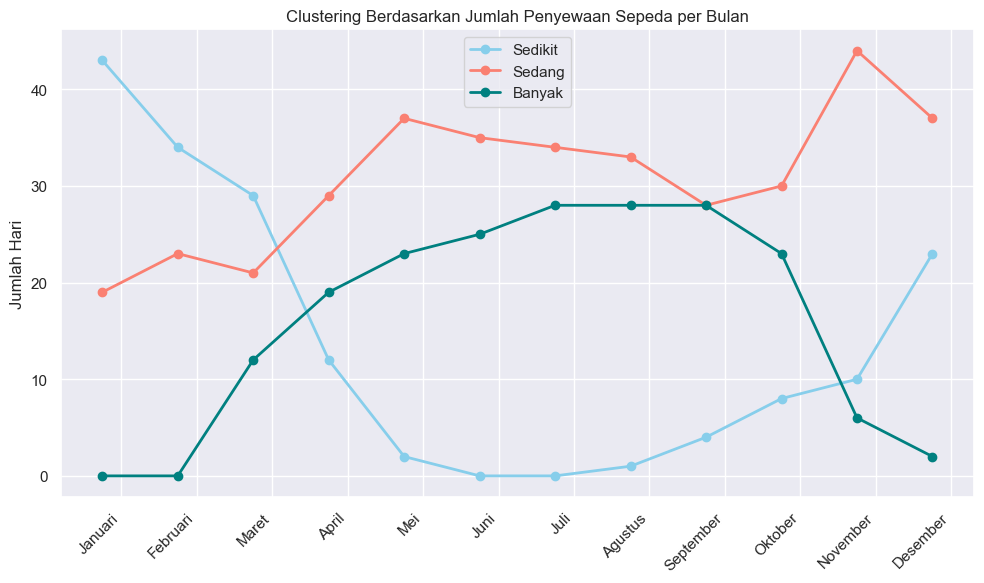

In [19]:
# Data untuk plotting
months = result.index
sedikit = result['Sedikit']
sedang = result['Sedang']
banyak = result['Banyak']

# Plotting garis untuk masing-masing cluster
plt.figure(figsize=(10, 6))
rng = range(len(months))
plt.plot(rng, sedikit, marker='o', color='skyblue', label='Sedikit', linewidth=2)
plt.plot(rng, sedang, marker='o', color='salmon', label='Sedang', linewidth=2)
plt.plot(rng, banyak, marker='o', color='teal', label='Banyak', linewidth=2)

# Menampilkan plot
plt.xlabel('')
plt.ylabel('Jumlah Hari')
plt.title('Clustering Berdasarkan Jumlah Peminjaman Sepeda per Bulan')
bar_width = 0.25
plt.xticks([r + bar_width for r in range(len(months))], months, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## Conclusion

- **Conclusion pertanyaan 1 :** Bagaimana pergerakan jumlah peminjaman sepeda berubah seiring waktu? <br>
<br>
<div align='justify'>
&emsp;&emsp;&emsp;&emsp;Berdasarkan analisis time series peminjaman sepeda selama 2 tahun, terlihat adanya fluktuasi yang kuat dalam jumlah peminjaman setiap minggunya. Pola musiman juga terlihat jelas, dengan titik tertinggi pada kuartal 2-3 setiap tahun dan titik terendah pada bulan Januari. Meskipun prediksi terjadi penurunan pada Januari 2013 berdasarkan garis moving average (4 minggu), garis tren menunjukkan kenaikan yang signifikan secara keseluruhan. Hal ini mengindikasikan bahwa peminjaman sepeda cenderung meningkat dari waktu ke waktu, menunjukkan potensi pertumbuhan yang baik untuk layanan ini. Diperlukan pemantauan terhadap faktor-faktor musiman dan strategi promosi yang tepat untuk memanfaatkan pertumbuhan ini secara optimal dalam jangka waktu yang lebih panjang.
</div>
            
---
- **Conclusion pertanyaan 2 :** Bagaimana musim memengaruhi jumlah peminjaman sepeda?<br>
<br>
<div align='justify'>
&emsp;&emsp;&emsp;&emsp;Berdasarkan analisis stacked barchart jumlah peminjaman sepeda berdasarkan musim tiap tahunnya, terlihat bahwa musim gugur menjadi musim yang paling banyak diminati oleh para peminjam, dengan jumlah peminjaman melebihi 1 juta selama periode 2011-2012. Hal ini berbanding terbalik dengan musim semi yang hanya mencapai sekitar 500 ribu peminjaman selama 2 tahun tersebut. Sementara itu, peminjaman pada musim dingin dan panas berada dalam kisaran 800-900 ribu. Selain itu, terlihat bahwa jumlah peminjaman pada tahun 2012 secara keseluruhan lebih tinggi dibandingkan dengan tahun 2011 untuk semua musim. Dapat disimpulkan bahwa musim memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda, dan pemahaman terhadap pola ini dapat menjadi dasar strategi peningkatan layanan dan promosi pada musim-musim tertentu.
</div>

---
- **Conclusion pertanyaan 3 :** Bagaimana perbandingan dari pengguna kasual dan pengguna yang terdaftar? <br>
<br>
<div align='justify'>
&emsp;&emsp;&emsp;&emsp;Berdasarkan analisis perbandingan antara pengguna kasual dan pengguna terdaftar dalam peminjaman sepeda, terlihat bahwa pengguna terdaftar mendominasi jumlah peminjaman hingga mencapai sekitar 80% dari total peminjaman pada kedua tahun, 2011 dan 2012. Meskipun terdapat fluktuasi kecil dalam persentase pengguna kasual, proporsi pengguna terdaftar tetap mendominasi secara konsisten. Hal ini mengindikasikan bahwa layanan peminjaman sepeda lebih banyak dimanfaatkan oleh pengguna terdaftar, yang mungkin memiliki langganan atau keanggotaan tetap. Dalam hal ini, strategi promosi dan peningkatan layanan lebih baik ditujukan untuk mempertahankan dan meningkatkan kepuasan pengguna terdaftar guna memanfaatkan potensi pasar yang besar dari segmen ini.
</div>

---
- **Conclusion pertanyaan 4 :** Bagaimana performa peminjaman sepeda tiap bulan?<br>
<br>
<div align='justify'>
&emsp;&emsp;&emsp;&emsp;Berdasarkan analisis performa peminjaman sepeda tiap bulan yang telah dikategorikan ke dalam cluster "Sedikit", "Sedang", dan "Banyak", terlihat bahwa tiap bulan memiliki pola yang berbeda dalam jumlah peminjaman. Bulan-bulan seperti Juni, Juli, dan Agustus cenderung memiliki jumlah peminjaman yang tinggi, masuk dalam cluster "Banyak", sementara bulan Januari, Februari, dan Maret cenderung memiliki jumlah peminjaman yang lebih rendah, masuk dalam cluster "Sedikit". Peningkatan jumlah peminjaman terlihat pada bulan-bulan yang lebih hangat seperti Mei hingga Agustus, sedangkan penurunan terjadi pada bulan-bulan yang cenderung lebih dingin. Dalam hal ini, informasi ini dapat membantu dalam perencanaan layanan dan inventarisasi sepeda untuk mengakomodasi permintaan yang fluktuatif setiap bulannya.
</div>